In [131]:
#Automatic settings, constants
#In an effort to make this easier to use, the most important / commonly used constants and configurations
#can be found here. Change the values, then go and run all

#Location to load data from (.txt file, make sure there is no text besides the first four rows)
file_path = 'DD_DATA\log_1.txt'

#List of all properties collected in the log, IN ORDER
properties = [
"status", 
"rpm", 
"rpm_count",
"act_vel", 
"enc_pos",  
"s_time", 
"f_time", 
"o_vol", 
"o_curr",
"couple",
"therm1",
"therm2",
"therm3",
"estop",
"wheel_count",
"wheel_rpm",
"roll_frame",
"exp_decay",
"ref_rpm",
"hall_in",
"hall_out",
"dt",
]

#List of Properties that may be normalized & graphed by the multi auto graphs 
properties_to_normalize = [
    "rpm", 
    "act_vel", 
    "enc_pos", 
    "o_vol", 
    "o_curr", 
    "couple", 
    "therm1", 
    "therm2", 
    "therm3",
    "dt",
    ]

#All of the tuples in this array will be graphed automatically
#In format (x, y), where x and y are strings found in properties
#Only for simple graphs where 2 properties are graphed against each other
#Will apply auto_crop if set to true
auto_graphs = [("s_time", "rpm"), 
               ("s_time", "enc_pos"), 
               ("s_time", "status"),
               ("s_time", "o_curr"),
               ("s_time", "o_vol"),
               ("s_time", "couple"),
               ("s_time", "therm1"),
               ("s_time", "therm2"),
               ("s_time", "therm3"),
               ("s_time", "roll_frame"),
              ]
# all tuples in this array will be graphed automatically, with as many properties as desired
# Format (x, y, z, a, ...)
# All points will be graphed vs the x value passed
multi_auto_graphs = [("s_time", "rpm", "enc_pos"), 
                    ("s_time", "rpm", "act_vel"), 
                    ("s_time", "o_curr", "act_vel"),
                    ("s_time", "enc_pos", "hall_in", "hall_out"),
                    ("s_time", "estop", "enc_pos"),
                    ("s_time", "roll_frame", "exp_decay"),
                    ("s_time", "roll_frame", "ref_rpm"),
                    ]

auto_crop = True #Auto crops based off of status codes and applies to all auto-generated graphs
manual_crop = (1000, 8000) #Add values to tuple in format (start, stop) to manually set crop (recommend plotting property vs index)
#Note: Turning auto crop off and leaving manual crop empty will produce graphs with no cropping

leading_indeces = 40 #Sets how many data points to include before and after the status code starts to change


In [132]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
#Import data from txt file
#NOTE: This will commonly throw an error in 2 situations
#1. If it says path not found, make sure you include the directory to the txt file
#2. If it says incorrect columns or something, there is probably some text in there that we dont want

data_log = np.loadtxt(file_path, dtype=float, delimiter=', ', skiprows=5, ndmin=2)

In [134]:
#The fifth line of the data log is the format the data will be presented in
with open(file_path) as f:
    data_order = f.readlines()[4].rstrip().split(', ')

#Given the list of properties above, construct a data object to contain all of the data, with the keys being the property names
# data = {}
# for i, property in enumerate(properties):
#     data[property] = data_log[:,i]

data = {}
for i, property in enumerate(data_order):
    if property in properties:
        data[property] = data_log[:,i]
    else:
        print("Property not recognized: " + property)

In [135]:
# If any properties are to be auto-graphed but are not supplied, remove them
properties_to_normalize = [x for x in properties_to_normalize if x in data_order]

auto_graphs = [x for x in auto_graphs if x[0] in data_order and x[1] in data_order]

multi_graph_set = set()
for x in multi_auto_graphs:
    multi_graph_set.update(x)
multi_graphs = [x for x in multi_auto_graphs if set(x).issubset(multi_graph_set) in data_order]

In [136]:
# normalize
# normalized_data = dict(data) # start with a copy to keep the non normalized data
# for property in properties_to_normalize:
#     n = max(abs(data[property]))
#     if abs(min(data[property])>n):
#         n = min(data[property])
#     if n == 0:
#         n = 0.01
#     normalized_data[property] = data[property]/n

# normalized_data["s_time"] = data["s_time"]

Auto-crop indexes: 2082 6429


Text(0.5, 1.0, 'Cropped Data')

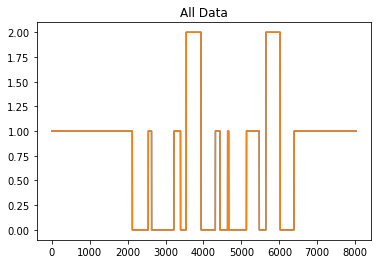

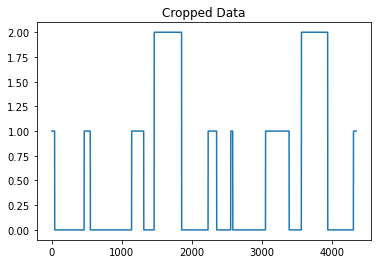

In [137]:
#Auto-Cropping
#The best way to determine when the drive stops/starts is to look for when the control code changes the first time and the last time
#This crop will then be applied to the rest of the data set and available in the cropped_data object

plt.figure(1)
plt.plot(data["status"][1:]) 
plt.title("All Data")
    

if auto_crop:
    plt.plot(data["status"][1:]) #First, remove the first point as it gives an errant reading

    first_status = data["status"][1]

    for i, status in enumerate(data["status"][1:]):
        if status != first_status:
            if i >= leading_indeces:
                crop_start = i-leading_indeces
            else:
                crop_start = i
            break

    last_status = data["status"][-1]

    reversed_status = data["status"][::-1]
    for i, status in enumerate(reversed_status):
        if status != last_status:
            if i >= leading_indeces:
                crop_end = len(data["status"]) - (i-leading_indeces)
            else:
                crop_end = len(data["status"]) - i
            break

    print("Auto-crop indexes:", crop_start, crop_end)
    plt.figure()
    #plt.plot(data["status"][crop_start:crop_end])
    
elif manual_crop:
    crop_start, crop_end = manual_crop
    
    
else: #No crop selected
    crop_start = 0
    crop_end = -1
    
plt.figure(2)
plt.plot(data["status"][crop_start:crop_end])
plt.title("Cropped Data")

ValueError: x and y must have same first dimension, but have shapes (8028,) and (4347,)

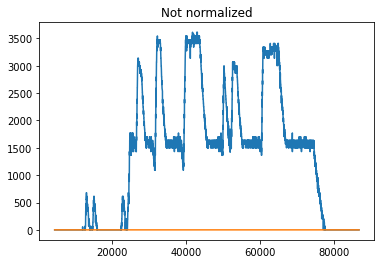

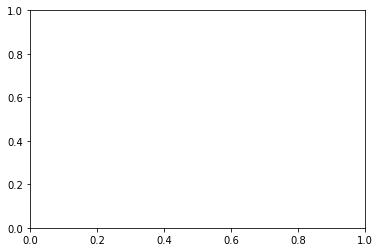

In [138]:
# normalize
normalized_data = dict(data) # start with a copy to keep the non normalized data
for property in properties_to_normalize:
    n = max(abs(data[property][crop_start:crop_end]))
    if abs(min(data[property][crop_start:crop_end])>n):
        n = min(data[property][crop_start:crop_end])
    if n == 0:
        n = 0.01
    normalized_data[property] = data[property][crop_start:crop_end]/n

normalized_data["s_time"] = data["s_time"]
plt.plot(data["s_time"], data["rpm"])
plt.plot(data["s_time"], data["status"])
plt.title("Not normalized")
plt.figure(2)
plt.plot(normalized_data["s_time"], normalized_data["rpm"])
plt.plot(normalized_data["s_time"], normalized_data["status"])
plt.title("Normalized")

In [ ]:
#add data member for time in seconds rather than milliseconds
data["time(s)"] = data["s_time"]/1000

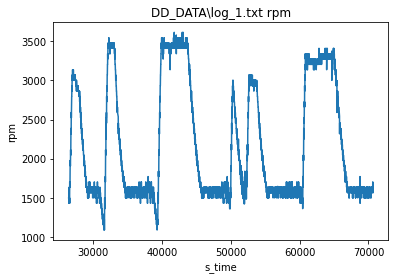

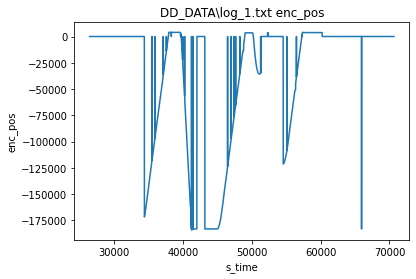

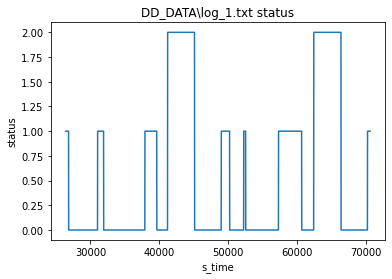

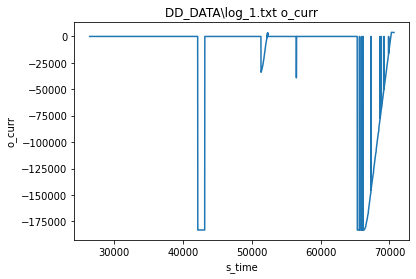

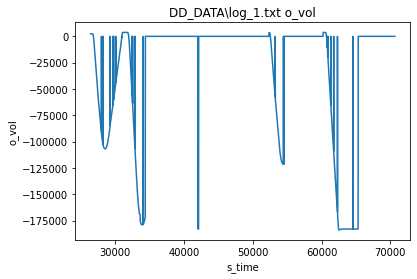

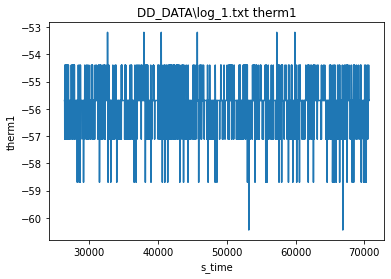

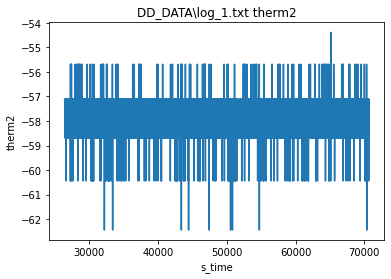

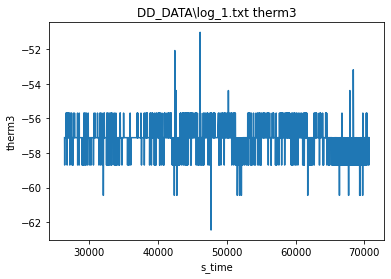

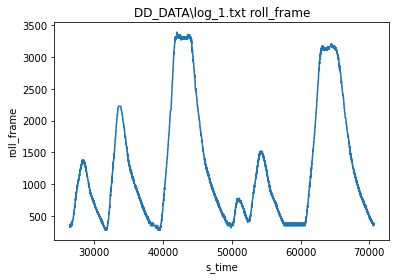

In [ ]:
#Auto generate graphs using the auto-crop ranges and graphs given in auto_graphs
for x, y in auto_graphs:
    plt.figure()
    plt.plot(data[x][crop_start:crop_end], data[y][crop_start:crop_end])
    plt.ylabel(y)
    plt.xlabel(x)
    plt.title(file_path + " " + y)

ValueError: x and y must have same first dimension, but have shapes (4347,) and (2265,)

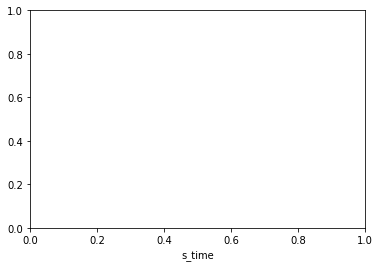

In [ ]:
#Auto Generate Multiproperty graphs
for x, *args in multi_auto_graphs:
    plt.figure()
    plt.xlabel(x)
    for arg in args:
        plt.plot(normalized_data[x][crop_start:crop_end], normalized_data[arg][crop_start:crop_end], label = arg)
    plt.legend()
    plt.title(file_path + ": " + x)

# for x, y, z in multi_auto_graphs:
#     plt.figure()
#     plt.plot(data[x][crop_start:crop_end], normalized_data[y][crop_start:crop_end], label = y)
#     plt.plot(data[x][crop_start:crop_end], normalized_data[z][crop_start:crop_end], label = z)
#     plt.xlabel(x)
#     plt.title(file_path + " " + y + " & " + z)
#     plt.legend()
    
# plt.plot(data["time_s"][crop_start:crop_end], normalized_data["rpm"][crop_start:crop_end], label = "rpm")
# plt.plot(data["time_s"][crop_start:crop_end], normalized_data["enc_pos"][crop_start:crop_end], label = "encoder_pos")
# plt.title(file_path)
# plt.legend()

Text(0.5, 1.0, 'DD_DATA\\log_1.txt Control Loop Time')

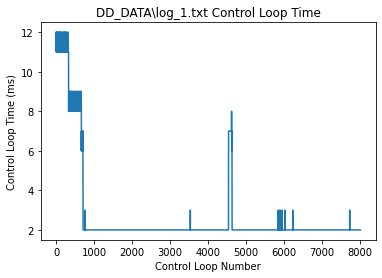

In [ ]:
plt.plot(data["f_time"] - data["s_time"])
plt.ylabel("Control Loop Time (ms)")
plt.xlabel("Control Loop Number")
plt.title(file_path + " Control Loop Time")

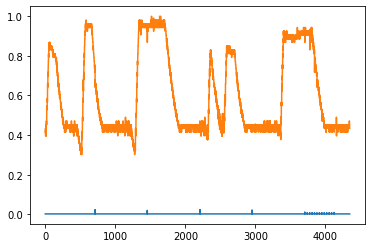

In [ ]:
plt.plot(normalized_data["dt"][crop_start:crop_end])
plt.plot(normalized_data["rpm"][crop_start:crop_end])

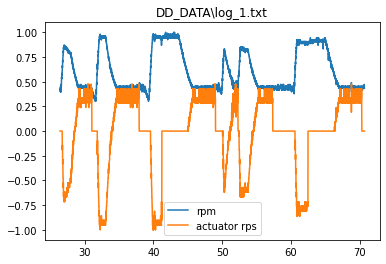

In [ ]:
#rpm and actuator shift speed graph
plt.plot(data["time_s"][crop_start:crop_end], normalized_data["rpm"][crop_start:crop_end], label = "rpm")
plt.plot(data["time_s"][crop_start:crop_end], normalized_data["act_vel"][crop_start:crop_end], label = "actuator rps")
plt.title(file_path)
plt.legend()